In [1]:
#Pracownia z Analizy Numerycznej (M), zadanie P.2.20, Mateusz Basiak

In [2]:
#algorytm(N,a,b,c,a_,b_,c_,A) - główna funkcja algorytmu, wylicza wynik i zwraca tablicę z obliczonymi współczynnikami.
#Przyjmuje argumenty:
#N - stopień wielomianu
#a,b,c - tablice rozmiaru N zawierające współczynniki równania rekurencyjnego ciągu p_n
#a_,b_,c_ - tablice rozmiaru N zawierające współczynniki równania rekurencyjnego ciągu q_n
#A - tablica rozmiaru N+1 zawierająca współczynniki A(n)

#podstawa_rekursji(N,a,b,c,a_,b_,c_,A) - funkcja obliczająca wyrazy dla k=1.
#Przyjmuje takie same argumenty jak funkcja algorytm. Zwraca ona tablicę rozmiaru N+1,
#której dwa pierwsze elementy to obliczone współczynniki.

#rekursja(N,a,b,c,a_,b_,c_,A,k,A_2,A_1) - funkcja obliczająca współczynniki dla danego indeksu górnego k.
#Zwraca tablicę rozmaru N+1 zawierającą te współczynniki na miejscach od 1 do k+1.
#Pierwsze osiem jej argumentów jest identycznych z argumentami funkcji algorytm. Dziewiąty to liczba k.
#Dwa ostatnie - A_2 oraz A_1 to tablice rozmiaru N+1,
#zawierające na swoich początkowych miejscach odpowiednio współczynniki dla indeksów górnych k-2 i k-1.

In [3]:
include("program.jl")
using Plots
using Printf;

In [4]:
#TEST 1
#Zamiana postaci potęgowej na wielomiany Czebyszewa

function to_Czebyszew(A)
    
    #Współczynniki postaci potęgowej:
    a = [ 0.0, 0.0, 0.0, 0.0, 0.0];
    b = [-1.0,-1.0,-1.0,-1.0,-1.0];
    c = [ 0.0, 0.0, 0.0, 0.0, 0.0];
    
    #Współczynniki postaci Czebyszewa:
    a_= [ 0.0, 0.0, 0.0, 0.0, 0.0];
    b_= [-1.0,-2.0,-2.0,-2.0,-2.0];
    c_= [ 1.0, 1.0, 1.0, 1.0, 1.0];

    #Wielomiany Czebyszewa:
    CZ0 = [1.0,  0.0, 0.0,  0.0, 0.0,  0.0];
    CZ1 = [0.0,  1.0, 0.0,  0.0, 0.0,  0.0];
    CZ2 = [-1.0, 0.0, 2.0,  0.0, 0.0,  0.0];
    CZ3 = [0.0, -3.0, 0.0,  4.0, 0.0,  0.0];
    CZ4 = [1.0,  0.0,-8.0,  0.0, 8.0,  0.0];
    CZ5 = [0.0,  5.0, 0.0,-20.0, 0.0, 16.0];
    
    A_=algorytm(5,a,b,c,a_,b_,c_,A);
    
    #Sprawdzanie poprawności wyniku
    czy_dobrze=1;
    for j in 1:6
        x=CZ0[j]*A_[1] + CZ1[j]*A_[2] + CZ2[j]*A_[3] + CZ3[j]*A_[4] + CZ4[j]*A_[5] + CZ5[j]*A_[6];
        if(x!=A[j])
            czy_dobrze=0;
        end
    end
    
    if(czy_dobrze==1)
        @printf("OK\n");
    else
        @printf("Wrong answer\n");
    end
end

A1=[1.0,1.0,1.0,1.0,1.0,1.0];
to_Czebyszew(A1);

A2=[1.0,2.0,3.0,4.0,5.0,6.0];
to_Czebyszew(A2);

A3=[1.0,-1.0,1.0,-1.0,1.0,-1.0];
to_Czebyszew(A3);

A4=[1.0,0.5,0.25,0.125,0.0625,0.03125];
to_Czebyszew(A4);

OK
OK
OK
OK


In [5]:
#TEST 2
#Zamiana postaci potęgowej na wielomiany Czebyszewa i z powrotem

#Współczynniki postaci potęgowej:
a=[0.0];
b=[-1.0];
c=[0.0];

#Współczynniki postaci Czebyszewa:
a_=[0.0];
b_=[-1.0];
c_=[1.0];

A=[1.0,1.0];

czy_dobrze=1;

for i in 2:50
    
    push!(A,1.0);
    push!(a,0.0);
    push!(b,-1.0);
    push!(c,0.0);
    push!(a_,0.0);
    push!(b_,-2.0);
    push!(c_,1.0);
    
    A_=algorytm(i,a,b,c,a_,b_,c_,A);
    A_wynik=algorytm(i,a_,b_,c_,a,b,c,A_);
    
    #Sprawdzanie poprawności wyniku
    czy_dobrze=1;
    for j in 1:(i+1)
        if(A_wynik[j]!=1.0)
            czy_dobrze=0
        end
    end
    if(czy_dobrze==0)
        @printf("Wrong answer\n");
    end
end

if(czy_dobrze==1)
    @printf("OK");
end

OK

In [6]:
#TEST 3
#Zamiana postaci Czebyszewa na bazę (x+r)^n dla r całkowitych

czy_dobrze=1;

function from_Czebyszew_to_binomial(r)
    
    #Współczynniki postaci Czebyszewa:
    a = [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
    b = [-1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0];
    c = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0];
    
    #Współczynniki w bazie (x+r)^n:
    a_= [-r,-r,-r,-r,-r,-r,-r,-r,-r,-r];
    b_= [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0];
    c_= [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
    
    A = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0];
    
    A_=algorytm(10,a,b,c,a_,b_,c_,A);
    A_wynik=algorytm(10,a_,b_,c_,a,b,c,A_);
    
    #Sprawdzanie poprawności wyniku
    czy_dobrze=1;
    for j in 1:11
        if(A_wynik[j]!=j)
            czy_dobrze=0
        end
    end
    
    if(czy_dobrze==0)
        @printf("Wrong answer\n");
    end
end

for r in -10.0:10.0
    if(r!=0)
        from_Czebyszew_to_binomial(r);
    end
end

if(czy_dobrze==1)
    @printf("OK");
end

OK

In [7]:
#TEST 4
#Zamiana postaci Czebyszewa na bazę (x+r)^n dla r niecałkowitych

czy_dobrze=1;
error_margin=0;
errors = [];

function from_Czebyszew_to_binomial(r)
    
    #Współczynniki postaci Czebyszewa:
    a = [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
    b = [-1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0];
    c = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0];
    
    #Współczynniki w bazie (x+r)^n:
    a_= [-r,-r,-r,-r,-r,-r,-r,-r,-r,-r];
    b_= [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0];
    c_= [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
    
    A = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0];
    
    A_=algorytm(10,a,b,c,a_,b_,c_,A);
    A_wynik=algorytm(10,a_,b_,c_,a,b,c,A_);
    
    #Sprawdzanie poprawności wyniku
    czy_dobrze=1;
    error_margin=0;
    for j in 1:11
        if(A_wynik[j]!=j)
            czy_dobrze=0;
            error=abs(A_wynik[j]-A[j])/A[j];
            if(error>error_margin)
                error_margin=error;
            end
        end
    end
    
    push!(errors, error_margin);
    
    if(czy_dobrze==1)
        println("OK")
    else
        println("Wrong answer, maximum error: ", error_margin);
    end
end

for r in 2:20
    from_Czebyszew_to_binomial(Float64(1/r));
end

OK
Wrong answer, maximum error: 1.6608936448392342e-13
OK
Wrong answer, maximum error: 7.043254868221993e-13
Wrong answer, maximum error: 5.284661597215745e-13
Wrong answer, maximum error: 1.9761969838327786e-13
OK
Wrong answer, maximum error: 4.707345624410664e-14
Wrong answer, maximum error: 2.646771690706373e-13
Wrong answer, maximum error: 6.661338147750939e-14
Wrong answer, maximum error: 1.1528555887707626e-12
Wrong answer, maximum error: 6.217248937900877e-14
Wrong answer, maximum error: 3.2862601528904634e-14
Wrong answer, maximum error: 5.400124791776761e-13
OK
Wrong answer, maximum error: 5.666578317686799e-13
Wrong answer, maximum error: 1.3233858453531866e-13
Wrong answer, maximum error: 6.075140390748857e-13
Wrong answer, maximum error: 3.490541189421492e-13


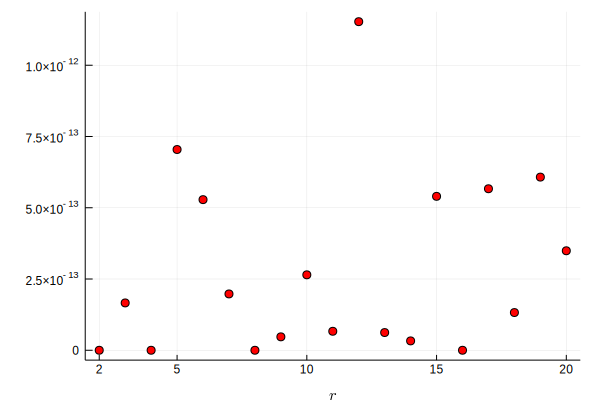

In [8]:
x=collect(2:20);
plot(x, errors, color="red",  seriestype=:scatter, legend=false, xlabel="\$r\$", xticks = [2,5,10,15,20])

In [9]:
savefig("error_Czebyszew_to_binomial.png");

In [10]:
#TEST 5
#Zamiana postaci Czebyszewa na bazę (x+r)^n dla r niecałkowitych i bardzo małych współczynników A_i

czy_dobrze=1;
error_margin=0;
errors = [];

function from_Czebyszew_to_binomial(r)
    
    #Współczynniki postaci Czebyszewa:
    a = [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
    b = [-1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0];
    c = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0];
    
    #Współczynniki w bazie (x+r)^n:
    a_= [-r,-r,-r,-r,-r,-r,-r,-r,-r,-r];
    b_= [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0];
    c_= [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
    
    A = [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001,  0.000001,  0.0000001,  0.00000001,  0.000000001,  0.0000000001];
    
    A_=algorytm(10,a,b,c,a_,b_,c_,A);
    A_wynik=algorytm(10,a_,b_,c_,a,b,c,A_);
    
    #Sprawdzanie poprawności wyniku
    czy_dobrze=1;
    error_margin=0;
    for j in 1:11
        if(A_wynik[j]!=j)
            czy_dobrze=0;
            error=abs(A_wynik[j]-A[j])/A[j];
            if(error>error_margin)
                error_margin=error;
            end
        end
    end
    
    push!(errors, error_margin);
    
    if(czy_dobrze==1)
        println("OK")
    else
        println("Wrong answer, maximum error: ", error_margin);
    end
end

for r in 2:20
    from_Czebyszew_to_binomial(Float64(1/r));
end

Wrong answer, maximum error: 1.6940658945086004e-16
Wrong answer, maximum error: 1.6543612251060553e-16
Wrong answer, maximum error: 1.6940658945086004e-16
Wrong answer, maximum error: 0
Wrong answer, maximum error: 1.6543612251060553e-16
Wrong answer, maximum error: 0
Wrong answer, maximum error: 1.6543612251060553e-16
Wrong answer, maximum error: 2.1684043449710089e-16
Wrong answer, maximum error: 2.1684043449710089e-16
Wrong answer, maximum error: 2.1175823681357508e-16
Wrong answer, maximum error: 2.1175823681357508e-16
Wrong answer, maximum error: 2.1175823681357508e-16
Wrong answer, maximum error: 2.1175823681357508e-16
Wrong answer, maximum error: 1.3552527156068805e-16
Wrong answer, maximum error: 0
Wrong answer, maximum error: 0
Wrong answer, maximum error: 0
Wrong answer, maximum error: 0
Wrong answer, maximum error: 2.1175823681357508e-16


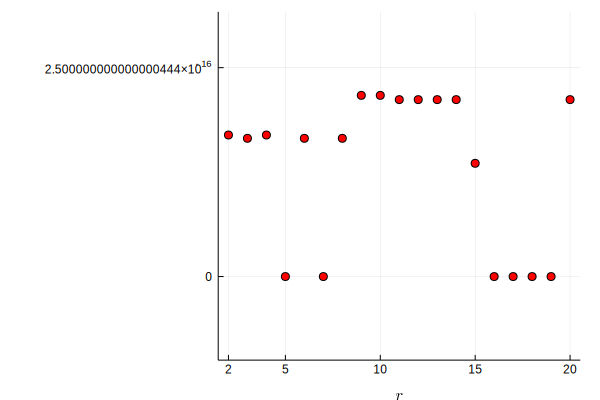

┌ Warning: No strict ticks found
└ @ PlotUtils /home/mateusz/.julia/packages/PlotUtils/GxT73/src/ticks.jl:173
┌ Warning: No strict ticks found
└ @ PlotUtils /home/mateusz/.julia/packages/PlotUtils/GxT73/src/ticks.jl:173
┌ Warning: No strict ticks found
└ @ PlotUtils /home/mateusz/.julia/packages/PlotUtils/GxT73/src/ticks.jl:173


In [11]:
x=collect(2:20);
plot(x, errors, color="red",  seriestype=:scatter, legend=false, xlabel="\$r\$", xticks = [2,5,10,15,20])

In [12]:
savefig("error2_Czebyszew_to_binomial.png");

┌ Warning: No strict ticks found
└ @ PlotUtils /home/mateusz/.julia/packages/PlotUtils/GxT73/src/ticks.jl:173
┌ Warning: No strict ticks found
└ @ PlotUtils /home/mateusz/.julia/packages/PlotUtils/GxT73/src/ticks.jl:173
┌ Warning: No strict ticks found
└ @ PlotUtils /home/mateusz/.julia/packages/PlotUtils/GxT73/src/ticks.jl:173
